In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import svm, datasets
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

## Zadanie 1

In [3]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df['target_names'] = df['target'].apply(lambda x: data.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
X = data.data
y = data.target

Z = (X - X.mean(axis=0)) / X.std(axis=0)    

In [14]:
# macierz kowariancji
c = np.cov(Z.T)

print(c)

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [16]:
# wyliczenie wrtości własnych i wektorów własnych
eig_vals, eig_vecs = np.linalg.eig(c)

# Posortuj według największych wartości własnych
sorted_idx = np.argsort(eig_vals)[::-1]
eig_vals_sorted = eig_vals[sorted_idx]
eig_vecs_sorted = eig_vecs[:, sorted_idx]

In [18]:
# Redukcja do 3 wymiarów
W_3D = eig_vecs_sorted[:, :3]  # wybieramy dwa pierwsze wektory własne
X_pca_3D = Z @ W_3D        # transformacja: Z = X * W

# Redukcja do 2 wymiarów
W_2D = eig_vecs_sorted[:, :2]  # wybieramy dwa pierwsze wektory własne
X_pca_2D = Z @ W_2D        # transformacja: Z = X * W

# Redukcja do 1 wymiaru
W_1D = eig_vecs_sorted[:, :1]
X_pca_1D = Z @ W_1D

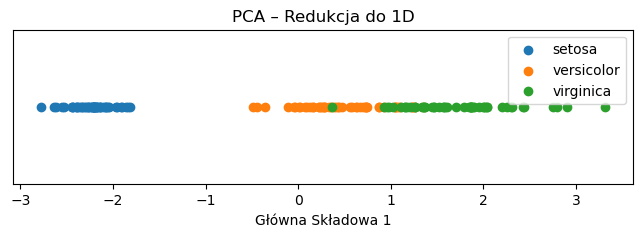

In [22]:
plt.figure(figsize=(8, 2))

for class_value, label in enumerate(data.target_names):
    plt.scatter(X_pca_1D[y == class_value], 
                np.zeros_like(X_pca_1D[y == class_value]), 
                label=label)

plt.title("PCA – Redukcja do 1D")
plt.xlabel("Główna Składowa 1")
plt.yticks([])
plt.legend()
plt.show()

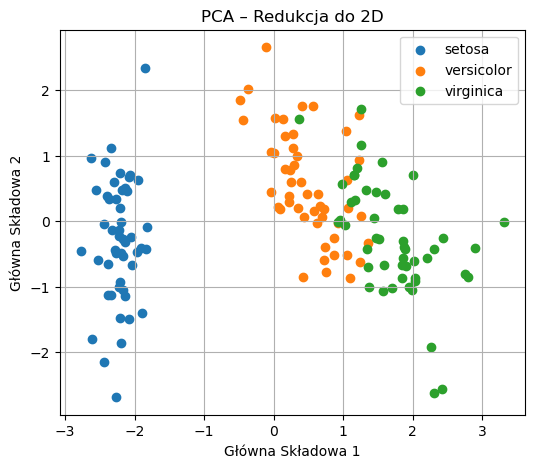

In [23]:
plt.figure(figsize=(6, 5))

for class_value, label in enumerate(data.target_names):
    plt.scatter(X_pca_2D[y == class_value, 0], 
                X_pca_2D[y == class_value, 1], 
                label=label)

plt.title("PCA – Redukcja do 2D")
plt.xlabel("Główna Składowa 1")
plt.ylabel("Główna Składowa 2")
plt.legend()
plt.grid(True)
plt.show()

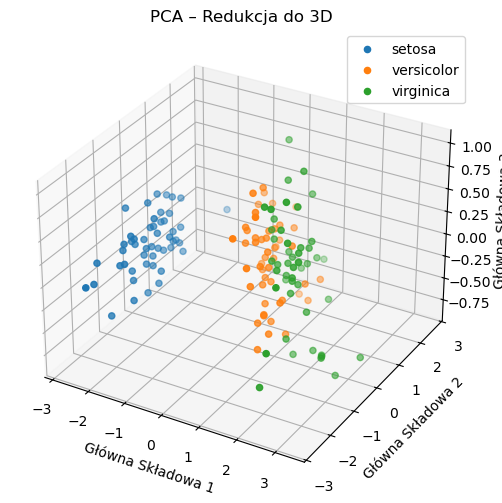

In [24]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for class_value, label in enumerate(data.target_names):
    ax.scatter(X_pca_3D[y == class_value, 0], 
               X_pca_3D[y == class_value, 1], 
               X_pca_3D[y == class_value, 2], 
               label=label)

ax.set_title("PCA – Redukcja do 3D")
ax.set_xlabel("Główna Składowa 1")
ax.set_ylabel("Główna Składowa 2")
ax.set_zlabel("Główna Składowa 3")
ax.legend()
plt.show()


In [27]:
# target_names = data.target_names

# # 6. Przygotowanie DataFrame do rysowania
# df_original = pd.DataFrame(X[:, :2], columns=["Feature 1", "Feature 2"])
# df_original['target'] = y

# df_standardized = pd.DataFrame(Z[:, :2], columns=["Feature 1 (Z)", "Feature 2 (Z)"])
# df_standardized['target'] = y

# df_pca = pd.DataFrame(X_pca_2D, columns=["PC1", "PC2"])
# df_pca['target'] = y

# # 7. Wykresy porównawcze
# fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# # Oryginalne dane (bez standaryzacji)
# for i, name in enumerate(target_names):
#     axes[0].scatter(df_original[df_original['target']==i]["Feature 1"], 
#                     df_original[df_original['target']==i]["Feature 2"], label=name)
# axes[0].set_title("Dane oryginalne")
# axes[0].set_xlabel("Feature 1")
# axes[0].set_ylabel("Feature 2")
# axes[0].legend()

# # Dane po standaryzacji
# for i, name in enumerate(target_names):
#     axes[1].scatter(df_standardized[df_standardized['target']==i]["Feature 1 (Z)"], 
#                     df_standardized[df_standardized['target']==i]["Feature 2 (Z)"], label=name)
# axes[1].set_title("Dane po standaryzacji")
# axes[1].set_xlabel("Z[Feature 1]")
# axes[1].set_ylabel("Z[Feature 2]")
# axes[1].legend()

# # Dane po PCA (2D)
# for i, name in enumerate(target_names):
#     axes[2].scatter(df_pca[df_pca['target']==i]["PC1"], 
#                     df_pca[df_pca['target']==i]["PC2"], label=name)
# axes[2].set_title("Dane po PCA (2D)")
# axes[2].set_xlabel("PC1")
# axes[2].set_ylabel("PC2")
# axes[2].legend()

# plt.tight_layout()
# plt.show()

## Zadanie 2

In [31]:
df = pd.read_csv('usarrests.csv', index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [33]:
df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [34]:
df.std()

Murder       4.355510
Assault     83.337661
UrbanPop    14.474763
Rape         9.366385
dtype: float64

In [40]:
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, columns=['V1', 'V2', 'V3', 'V4'])
pca_loadings

,V1,V2,V3,V4
Murder,0.535899,-0.418181,-0.341233,-0.649228
Assault,0.583184,-0.187986,-0.268148,0.743407
UrbanPop,0.278191,0.872806,-0.378016,-0.133878
Rape,0.543432,0.167319,0.817778,-0.089024


In [41]:
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
df_plot.head()

,PC1,PC2,PC3,PC4
Alabama,0.985566,-1.133392,-0.444269,-0.156267
Alaska,1.950138,-1.073213,2.040003,0.438583
Arizona,1.763164,0.745957,0.054781,0.834653
Arkansas,-0.141420,-1.119797,0.114574,0.182811
California,2.523980,1.542934,0.598557,0.341996


C:\Users\Tomek\AppData\Local\Temp\ipykernel_16872\1853737015.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.arrow(0,0,-pca_loadings.V1[0], -pca_loadings.V2[0])
C:\Users\Tomek\AppData\Local\Temp\ipykernel_16872\1853737015.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.arrow(0,0,-pca_loadings.V1[1], -pca_loadings.V2[1])
C:\Users\Tomek\AppData\Local\Temp\ipykernel_16872\1853737015.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use 

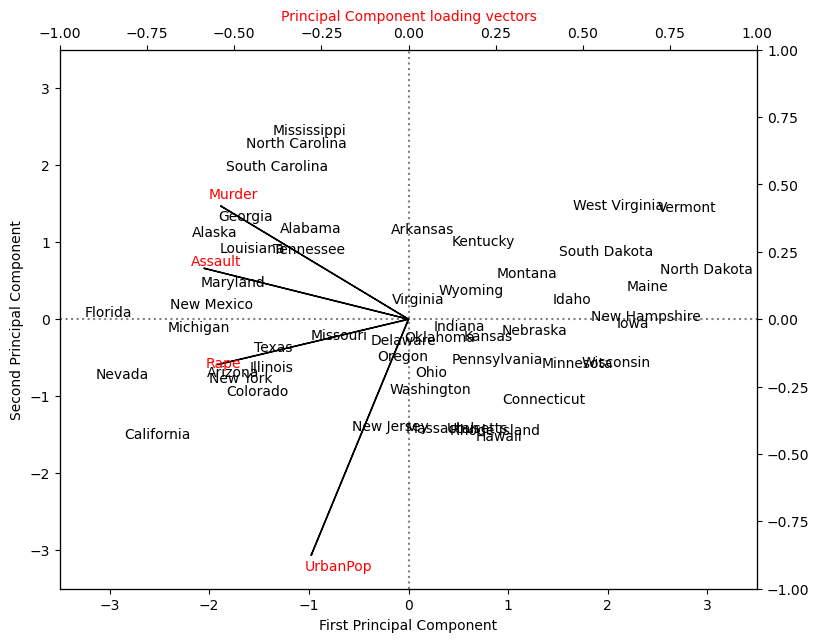

In [42]:
fig , ax1 = plt.subplots(figsize=(9,7))
ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)
# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (-df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')
    
# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')

# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny()
ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.set_xlabel('Principal Component loading vectors', color='red')

# Plot labels for vectors. Variable ’a’ is a small offset parameter to separate arrow tip and te
a = 1.07
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (-pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='red')


# Plot vectors
ax2.arrow(0,0,-pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,-pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,-pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,-pca_loadings.V1[3], -pca_loadings.V2[3])

In [43]:
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [44]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

([<matplotlib.axis.XTick at 0x1cf6e973010>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

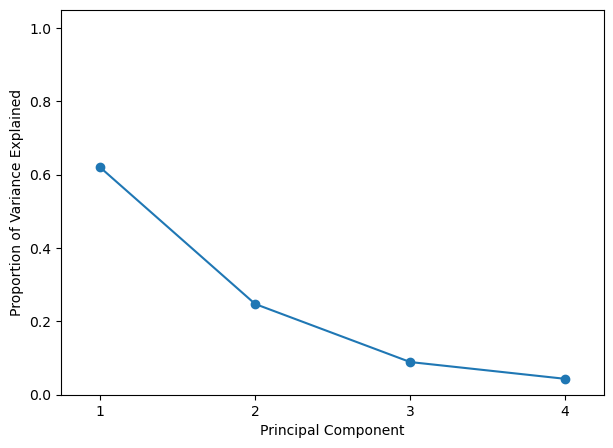

In [45]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])

([<matplotlib.axis.XTick at 0x1cf6ea088e0>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

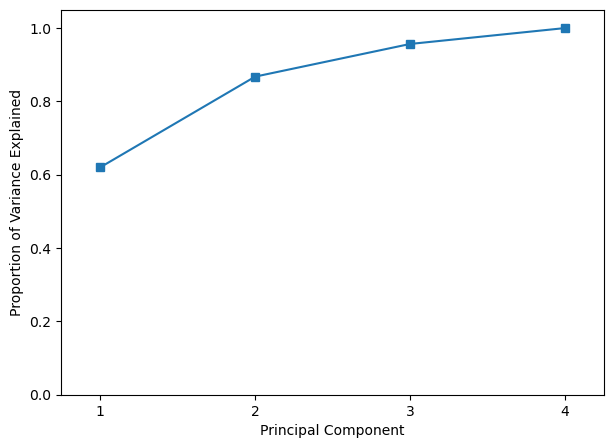

In [47]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])

In [48]:
df2 = pd.read_csv('nci60.csv').drop('Unnamed: 0', axis=1)
df2.columns = np.arange(df2.columns.size)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 6830 entries, 0 to 6829
dtypes: float64(6830)
memory usage: 3.3 MB


In [49]:
y = pd.read_csv('nci60_y.csv', usecols=[1], skiprows=1, names=['type'])

In [51]:
# Scale the data
X = pd.DataFrame(scale(df2))
X.shape

# Fit the PCA model and transform X to get the principal components
pca2 = PCA()
df2_plot = pd.DataFrame(pca2.fit_transform(X))

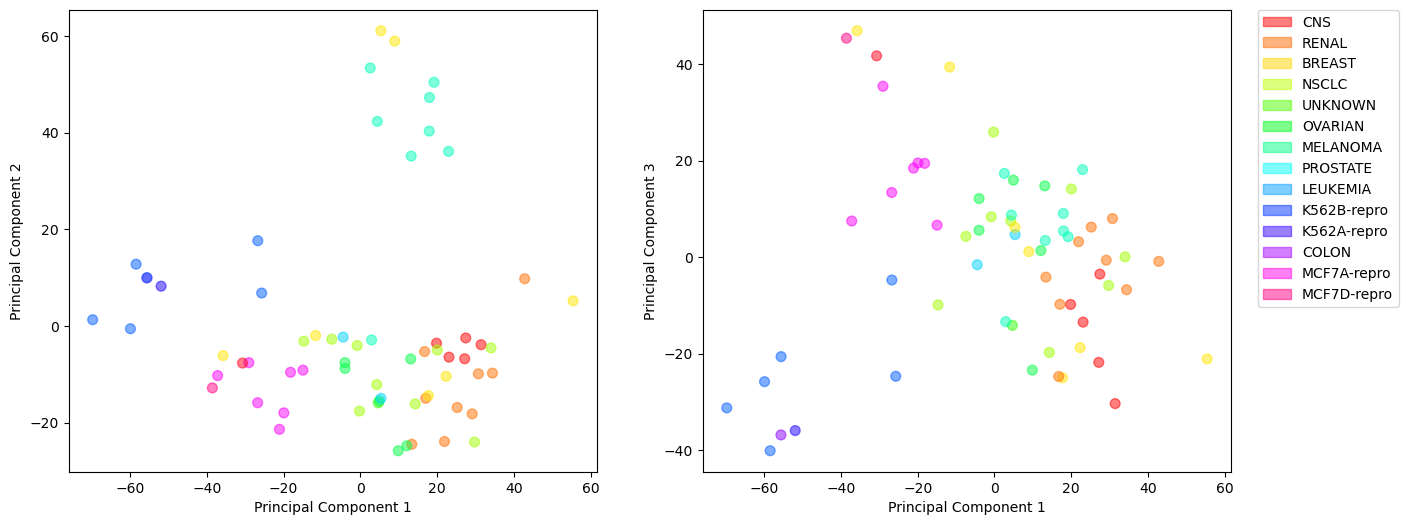

In [52]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
color_idx = pd.factorize(y.type)[0]
cmap = mpl.cm.hsv

# Left plot
ax1.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,1], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax1.set_ylabel('Principal Component 2')
               
# Right plot
ax2.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,2], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax2.set_ylabel('Principal Component 3')
# Custom legend for the classes (y) since we do not create scatter plots per class (which could
handles = []
labels = pd.factorize(y.type.unique())
norm = mpl.colors.Normalize(vmin=0.0, vmax=14.0)
for i, v in zip(labels[0], labels[1]):
    handles.append(mpl.patches.Patch(color=cmap(norm(i)), label=v, alpha=0.5))

ax2.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# xlabel for both plots
for ax in fig.axes:
    ax.set_xlabel('Principal Component 1')

In [57]:
pd.DataFrame([df2_plot.iloc[:,:5].std(axis=0, ddof=0).to_numpy(), pca2.explained_variance_ratio_[:5], np.cumsum(pca2.explained_variance_ratio_[:5])], index=['Standard Deviation', 'Proportion of Variance', 'Cumulative Proportion'], columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

,PC1,PC2,PC3,PC4,PC5
Standard Deviation,27.853469,21.481355,19.820465,17.032556,15.971807
Proportion of Variance,0.113589,0.067562,0.057518,0.042476,0.037350
Cumulative Proportion,0.113589,0.181151,0.238670,0.281145,0.318495


Text(0, 0.5, 'Variances')

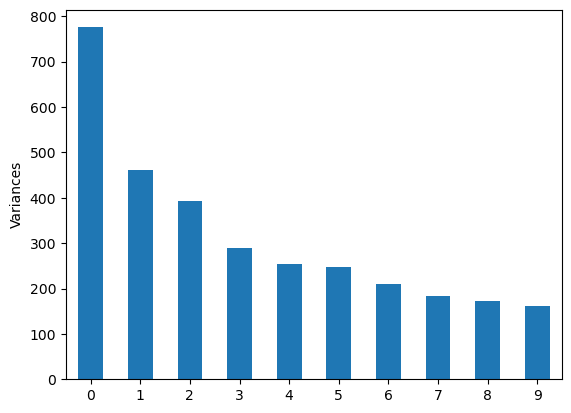

In [58]:
df2_plot.iloc[:,:10].var(axis=0, ddof=0).plot(kind='bar', rot=0)
plt.ylabel('Variances')

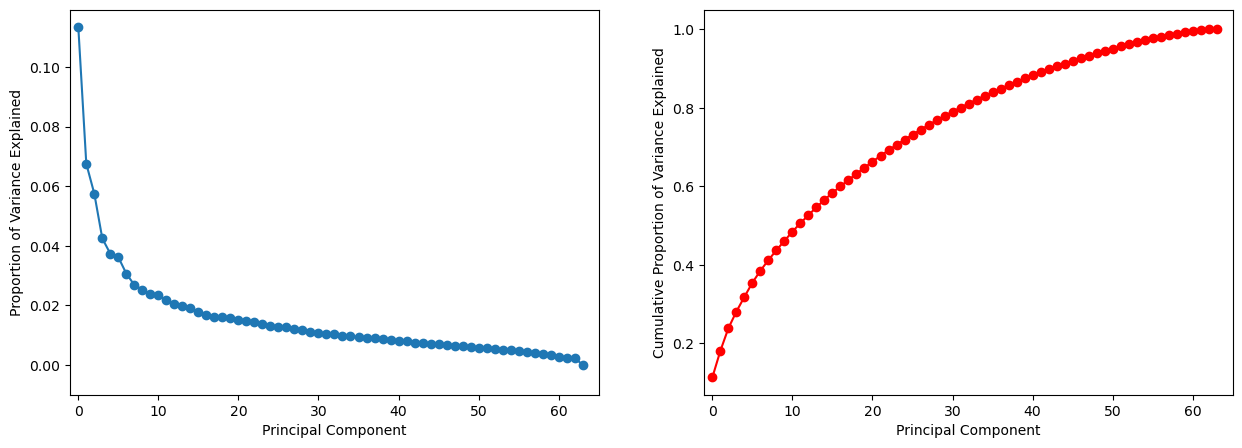

In [59]:
fig , (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

# Left plot
ax1.plot(pca2.explained_variance_ratio_, '-o')
ax1.set_ylabel('Proportion of Variance Explained')
ax1.set_ylim(ymin=-0.01)

# Right plot
ax2.plot(np.cumsum(pca2.explained_variance_ratio_), '-ro')
ax2.set_ylabel('Cumulative Proportion of Variance Explained')
ax2.set_ylim(ymax=1.05)
for ax in fig.axes:
    ax.set_xlabel('Principal Component')
    ax.set_xlim(-1,65)